## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2datasetd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


sns.set(style="whitegrid")
sns.set_context('talk')



C:\Users\mypcl\AppData\Local\Temp\ipykernel_10320\3695689497.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [14]:
dataset = pd.read_csv('titanic.csv')

print(dataset.info())
print(dataset.describe())
print(dataset.shape)
print(dataset.columns)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [3]:
skip = dataset.isnull().sum()

print(skip)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

----------------------------------------------------------------------------------------------------------
За допомогою цього коду, можна зрозуміти, що найбільше пропущених значень у cabin, також багато не заповнених полів у age, також  є тільки 2 припущених значень у Embarked.

----------------------------------------------------------------------------------------------------------


***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



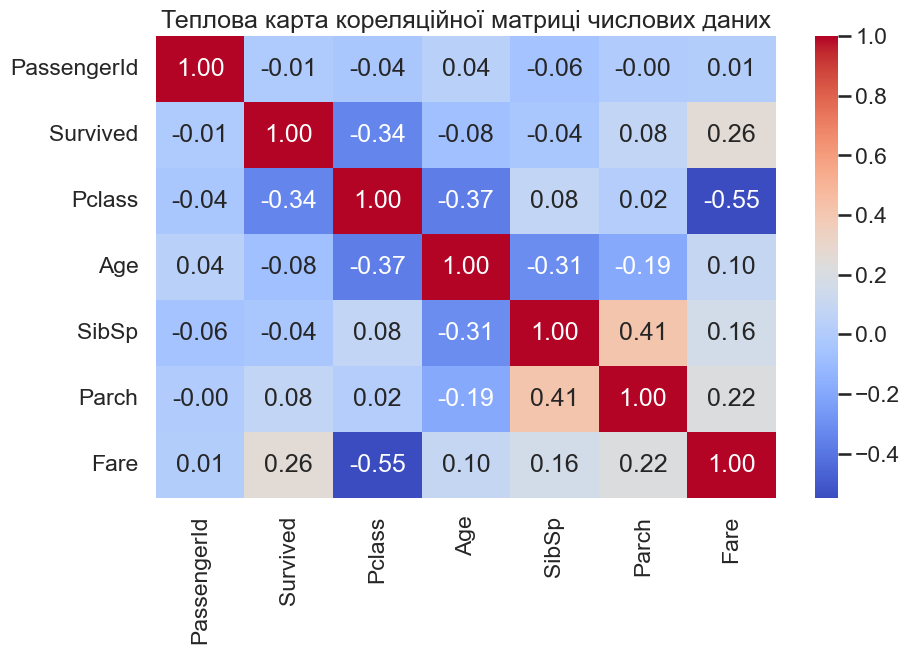

In [4]:
numdata = dataset.select_dtypes(include=[np.number])
matrix = numdata.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Теплова карта кореляційної матриці числових даних')
plt.show()


Ваші висновки:

----------------------------------------------------------------------------------------------------------
Коли ми бачимо високі кореляції між певними змінними, це означає, що вони сильно пов'язані між собою, і це може допомогти нам у прогнозуванні. Але якщо кореляція між змінними низька, це може означати, що вони не дуже впливають одна на одну або на те, що ми намагаємося передбачити.

----------------------------------------------------------------------------------------------------------

Ваші висновки:

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [5]:
def fill_missing_values_with_median_corrected(dataset, target, group):
    """
    Функція заповнює пропущені значення в цільовій колонці медіаною, розрахованою за групами.
    
    :param dataframe: DataFrame для обробки.
    :param target_column: Назва колонки, в якій потрібно заповнити пропущені значення.
    :param grouping_columns: Список колонок для групування перед розрахунком медіани.
    :return: DataFrame з заповненими пропущеними значеннями.
    """
    return dataset.fillna({
        target: dataset.groupby(group)[target].transform('median')
    })

dataset_fill = fill_missing_values_with_median_corrected(dataset, 'Age', ['Pclass', 'Sex'])



Ваші висновки:

----------------------------------------------------------------------------------------------------------
У датасеті Titanic було виявлено 177 пропущених значень у колонці віку. Заповнення цих пропусків медіаною за групами дозволило ефективно вирішити цю проблему без втрати цінної інформації.

----------------------------------------------------------------------------------------------------------

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\mypcl\AppData\Local\Temp\ipykernel_10320\4138514406.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age_bin = dataset.groupby('Age_bin')['Survived'].sum()


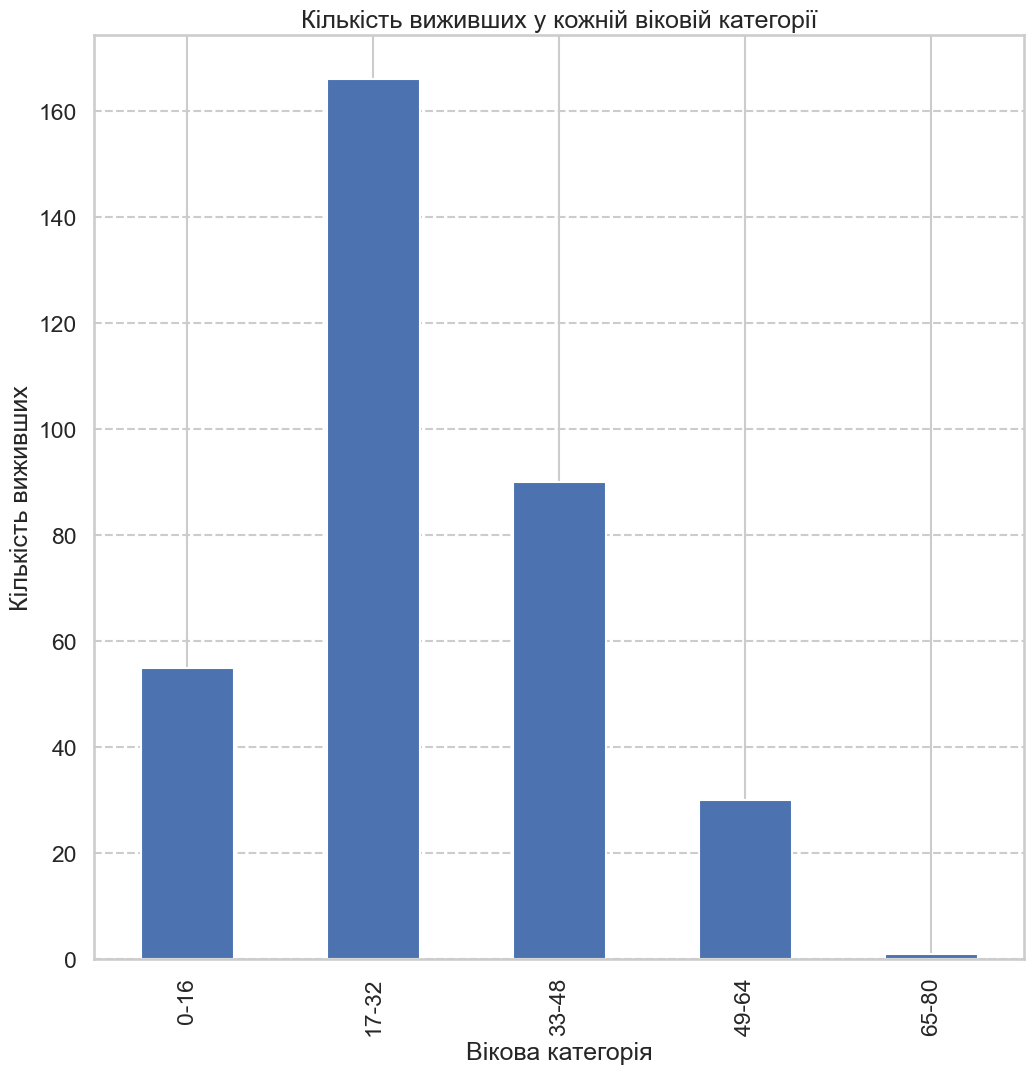

In [6]:
dataset['Age'] = dataset.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])

survived_by_age_bin = dataset.groupby('Age_bin')['Survived'].sum()

plt.figure(figsize=(12, 12))
survived_by_age_bin.plot(kind='bar')
plt.title('Number of survivors in each age category')
plt.xlabel('Age category')
plt.ylabel('Number of survivors')
plt.xticks(np.arange(5), labels=['0-16', '17-32', '33-48', '49-64', '65-80'])
plt.grid(axis='y', linestyle='--')
plt.show()


***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Fare_bin
0     44
1     68
2    101
3    129
Name: Survived, dtype: int64


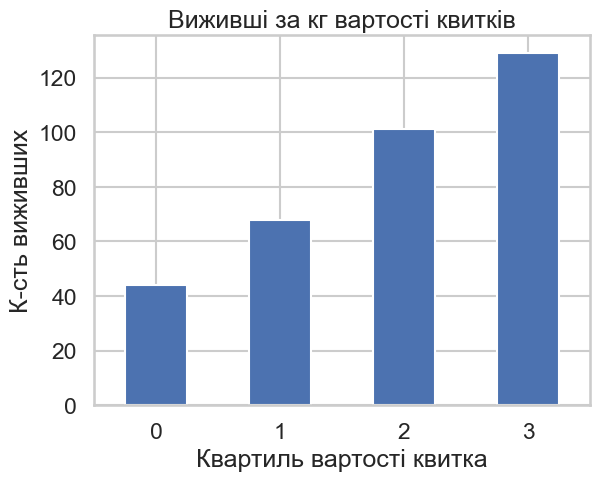

In [7]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], 4, labels=False)
fare_bin = dataset.groupby('Fare_bin')['Survived'].sum()

print(fare_bin)

fare_bin.plot(kind='bar')
plt.title('Survivors per kg of ticket price')
plt.xlabel('Quartile of the ticket price')
plt.ylabel('Number of survivors')
plt.xticks(rotation=0)
plt.show()


Ваші висновки:

----------------------------------------------------------------------------------------------------------
На графіку видно, що кількість виживших пасажирів зростає разом із вартістю квитка. Ті, хто заплатив за квиток найвищу квартильну вартість, мають найвищі шанси на виживання, тоді як пасажири з квитками в найнижчій квартилі вижили найменше. Це вказує на те, що дорожчі квитки могли бути пов'язані з кращим розміщенням на борту або доступом до рятувальних засобів.

----------------------------------------------------------------------------------------------------------

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

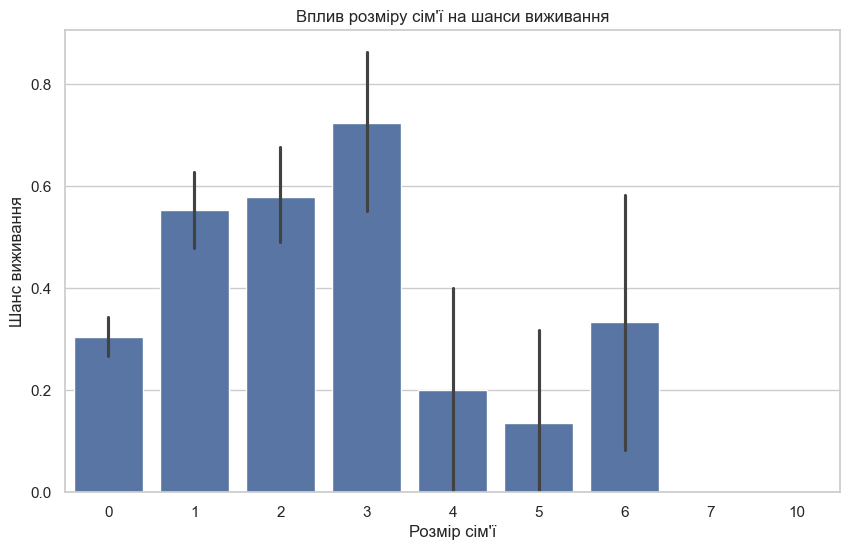

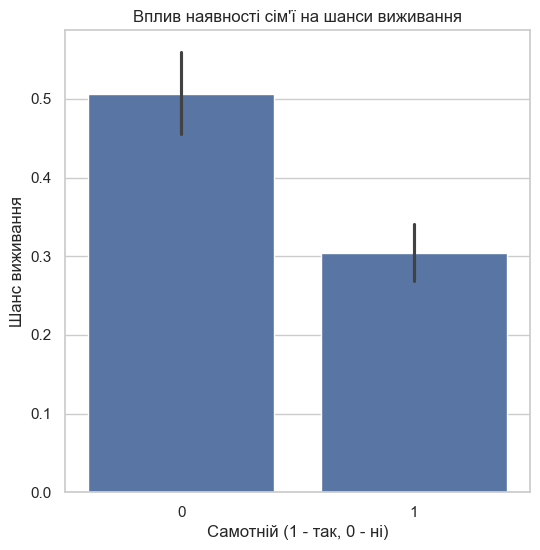

In [8]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_size', y='Survived', data=dataset)
plt.title('Impact of family size on survival chances')
plt.xlabel('Family size')
plt.ylabel('The chance of survival')
plt.show()

plt.figure(figsize=(6, 6))
sns.barplot(x='Alone', y='Survived', data=dataset)
plt.title('The impact of having a family on survival chances')
plt.xlabel('Single (1 - yes, 0 - no)')
plt.ylabel('The chance of survival')
plt.show()

Ваші висновки:

----------------------------------------------------------------------------------------------------------

Пасажири "Титаніка", які подорожували з сім'єю, мали більші шанси вижити, особливо ті, хто мав сімейний розмір від 1 до 3 осіб. Ті, хто був на борту самотньо, мали менші шанси на виживання. Великі сім'ї, з чотирма і більше членами, зазнавали труднощів під час евакуації, що знижувало їхні шанси на порятунок.

----------------------------------------------------------------------------------------------------------

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [9]:
clean = dataset.drop('Cabin', axis=1)
clean.to_csv('оновлений_titanic.csv', index=False)

Ваші висновки:

----------------------------------------------------------------------------------------------------------
Тому що у Cabin багато пропущених значень, які на мою думку неможливо заповнити.

----------------------------------------------------------------------------------------------------------

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [10]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

sex_mapping = {"male": 0, "female": 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

embarked_dummies = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
dataset = pd.concat([dataset, embarked_dummies], axis=1)

dataset.drop('Embarked', axis=1, inplace=True)

label_encoder = LabelEncoder()
dataset['Title'] = label_encoder.fit_transform(dataset['Title'])

print(dataset.head())

title_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(title_mapping)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Age_bin  Fare_bin  Family_size  Alone  \
0         A/5 21171   7.2500   NaN       1         0            1      0   
1          PC 17599  71.2833   C85       2         3            1      0   
2  STON/O2. 3101282   7.9250   NaN       1         1            0   

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\mypcl\AppData\Local\Temp\ipykernel_10320\64005303.py:1: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Ваші висновки:

----------------------------------------------------------------------------------------------------------
Перетворення змінних у числові значення є критичним для аналізу даних, оскільки більшість алгоритмів машинного навчання потребують числового формату для всіх вхідних даних.

----------------------------------------------------------------------------------------------------------

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



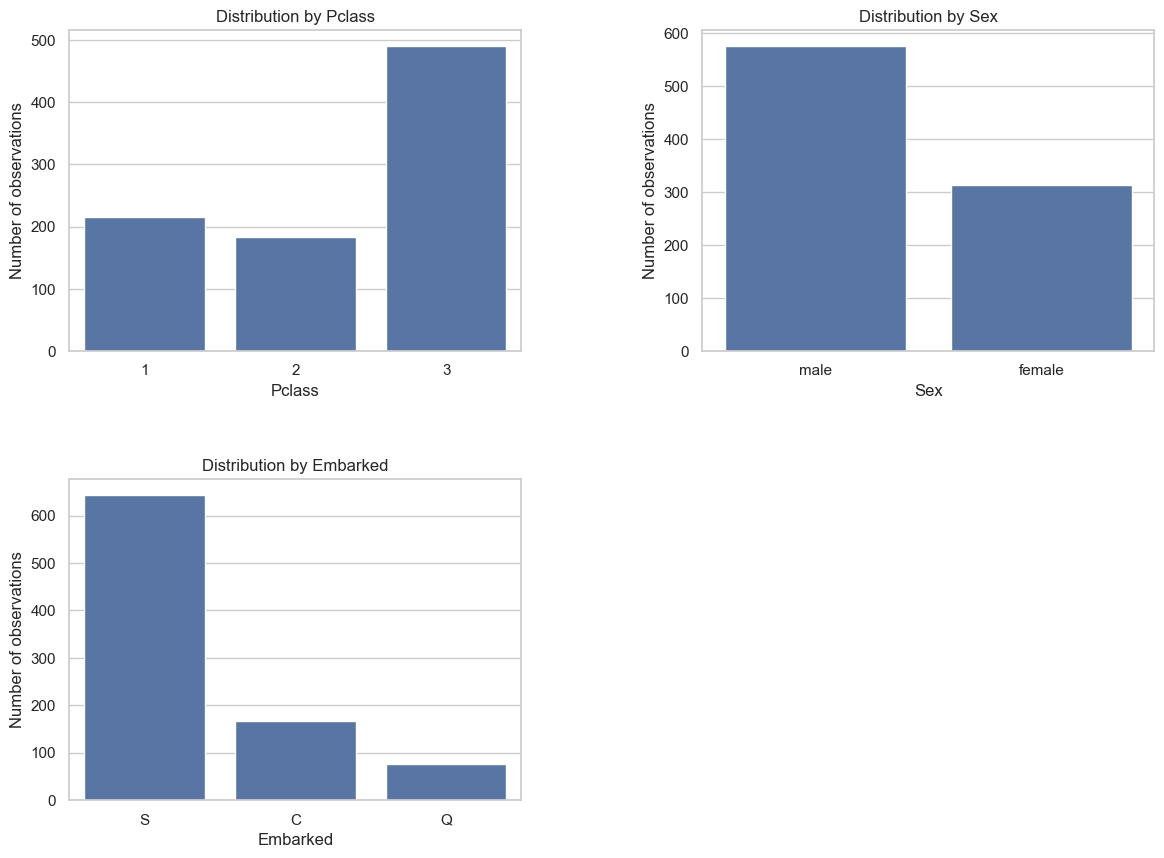

In [15]:
categorical_vars = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 

for i, var in enumerate(categorical_vars):
    sns.countplot(data=dataset, x=var, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution by {var}')
    axes[i//2, i%2].set_ylabel('Number of observations')
    axes[i//2, i%2].set_xlabel(var)

axes[1, 1].set_visible(False)

plt.show()

Ваші висновки:

----------------------------------------------------------------------------------------------------------

На графіках видно, що більшість пасажирів "Титаніка" обрали квитки третього класу, вказуючи на популярність економічних варіантів. Чоловіків на борту було більше, що вплинуло на виживання під час катастрофи. Саутгемптон був основним портом відправлення для пасажирів.

----------------------------------------------------------------------------------------------------------


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

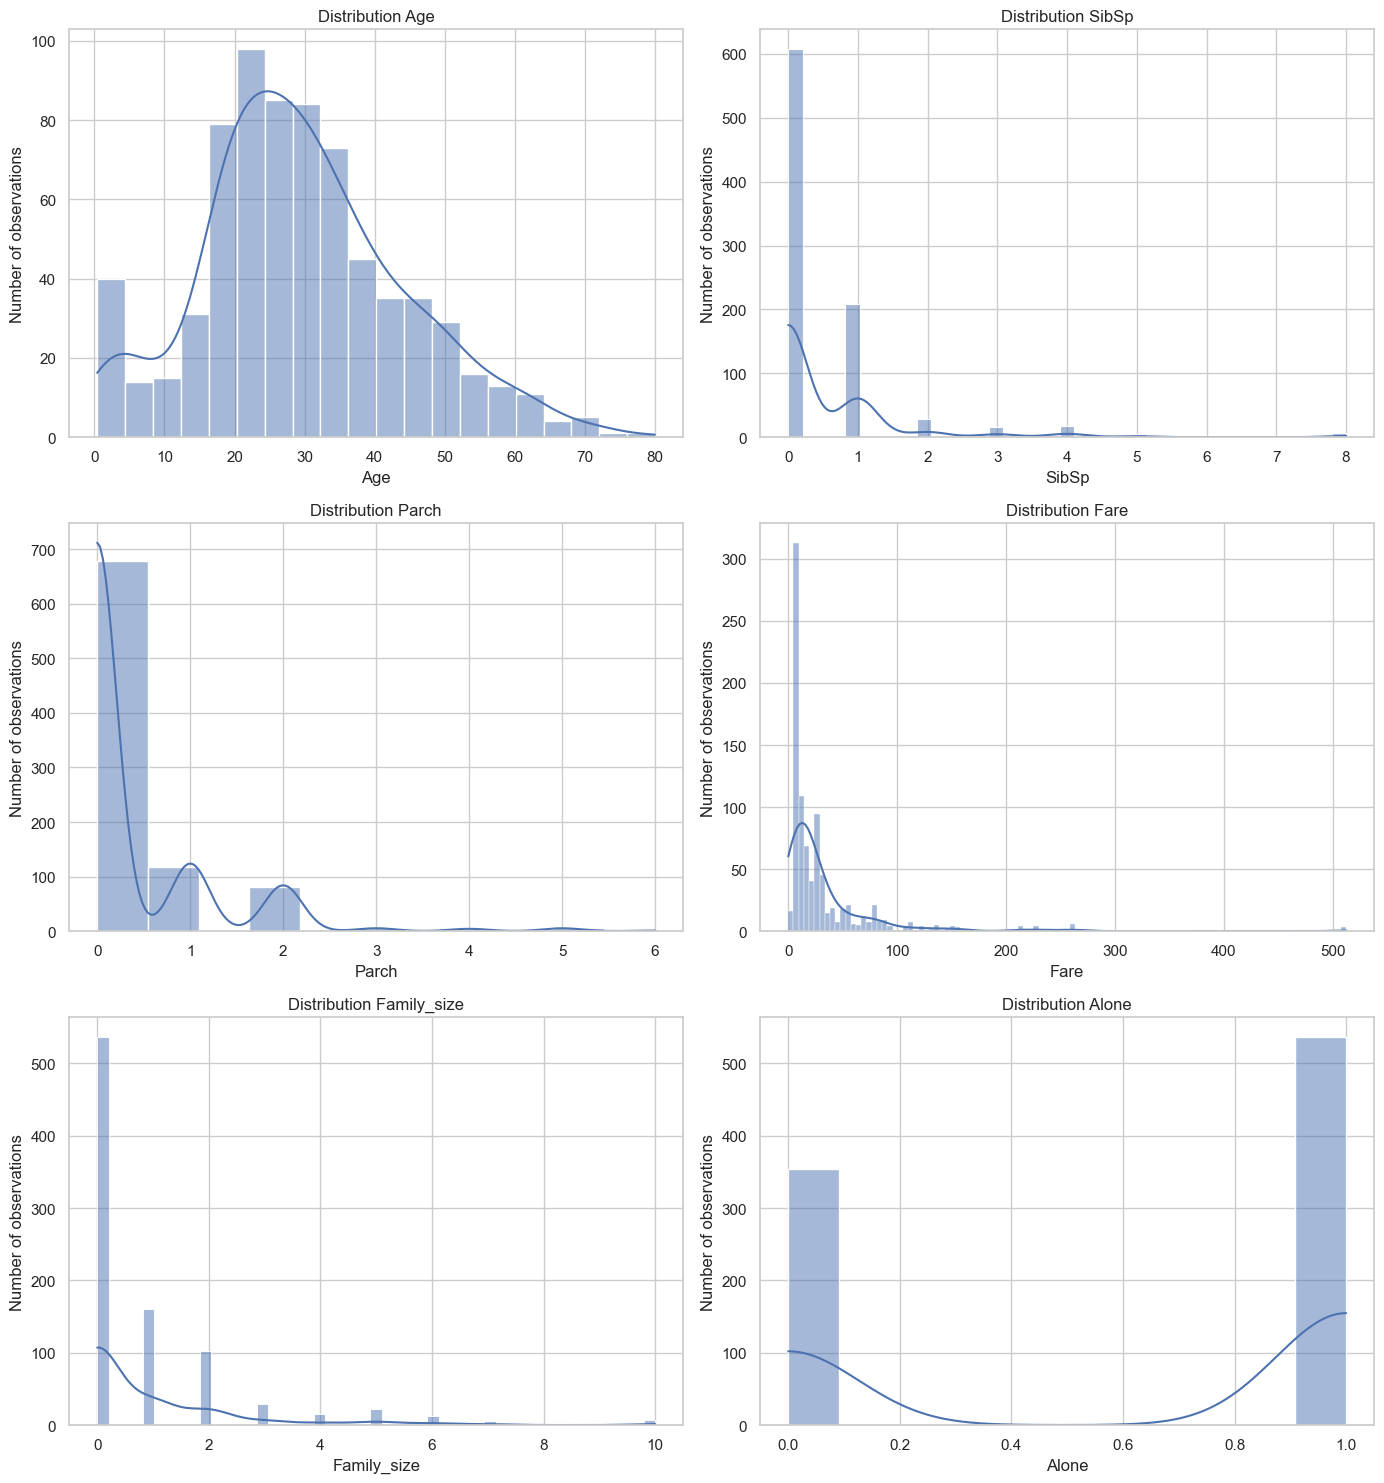

In [16]:
dataset['Family_size'] = dataset['SibSp'] + dataset['Parch']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

numeric_vars = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Alone']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3) 

for i, var in enumerate(numeric_vars):
    sns.histplot(dataset[var], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution {var}')
    axes[i//2, i%2].set_ylabel('Number of observations')
    axes[i//2, i%2].set_xlabel(var)

if len(numeric_vars) % 2 != 0:
    axes[len(numeric_vars)//2, len(numeric_vars)%2].set_visible(False)

plt.tight_layout()
plt.show()

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

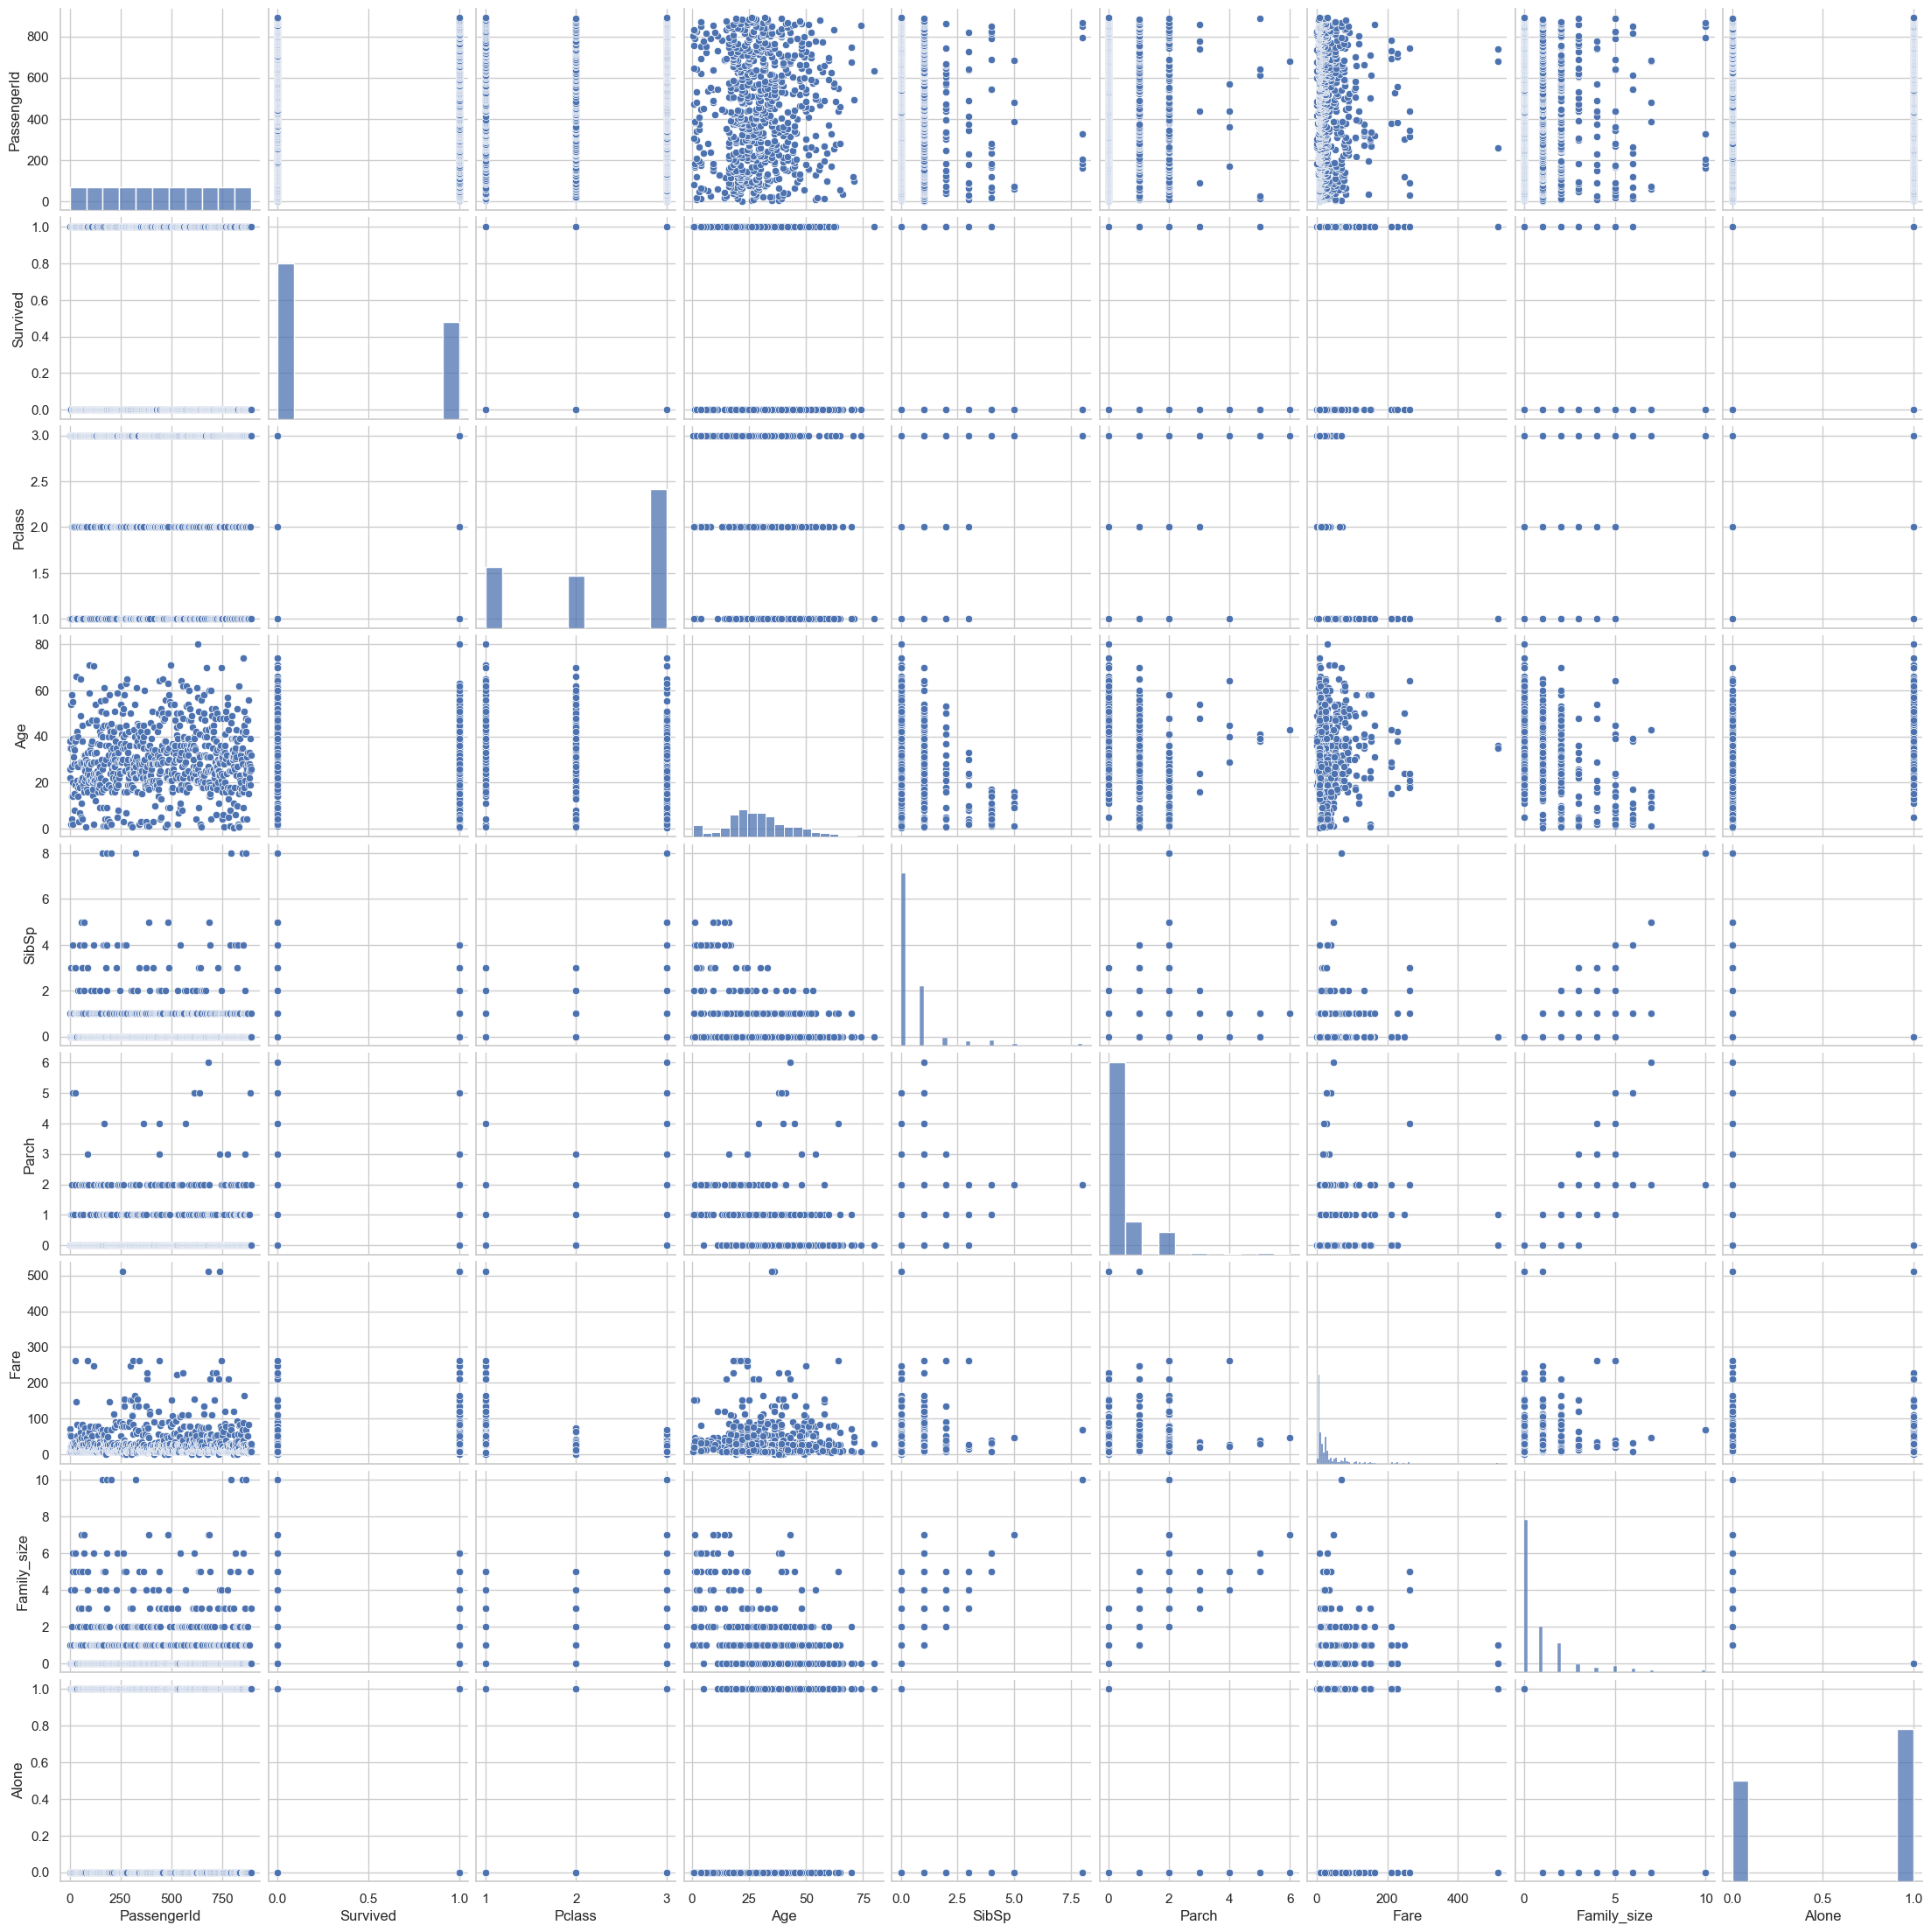

In [17]:
sns.pairplot(dataset)
plt.show()

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.